## Import the Libraries and Data

In [125]:
# Let's import our libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [126]:
# Since we are going to mae lot of visualization, let's set some visualization parameters in order to have same plots size
plt.rcParams['figure.figsize'] = [12,6]
sns.set_style('darkgrid')

In [127]:
#house = pd.read_excel('/home/utkarsh/LearnBay/ML_Python/Maison.xlsx') ## Reading the data
house = pd.read_csv("Maison.csv")

In [128]:
house.head()

,PRIX,SUPERFICIE,CHAMBRES,SDB,ETAGES,ALLEE,SALLEJEU,CAVE,GAZ,AIR,GARAGES,SITUATION
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


# Data Transformations & Analysis

In [129]:
# Since the columns are in french, in order to make them more readable, let's translate them into English
house = house.rename(index = str, columns = {'PRIX':'price','SUPERFICIE': 'area','CHAMBRES': 'rooms', 
                         'SDB': 'bathroom', 'ETAGES': 'floors','ALLEE': 'driveway',
                         'SALLEJEU':'game_room', 'CAVE': 'cellar', 
                         'GAZ': 'gas', 'AIR':'air', 'GARAGES': 'garage', 'SITUATION': 'situation'})

In [130]:
house.head()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


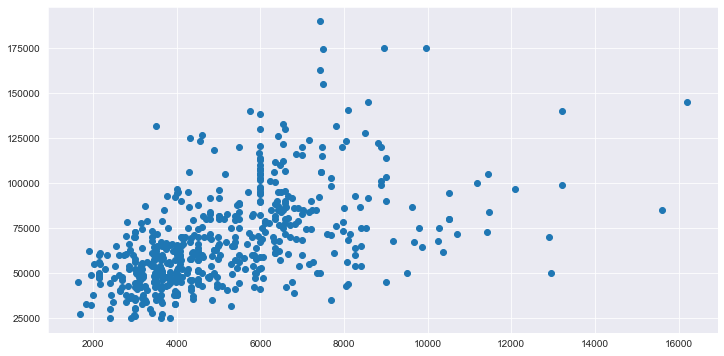

In [131]:
# Let's see ig we have a linear relation between price and area
#sns.palettes(house['area'], house['price'], palette = 'viridis')
plt.scatter(house['area'], house['price'])
plt.show()

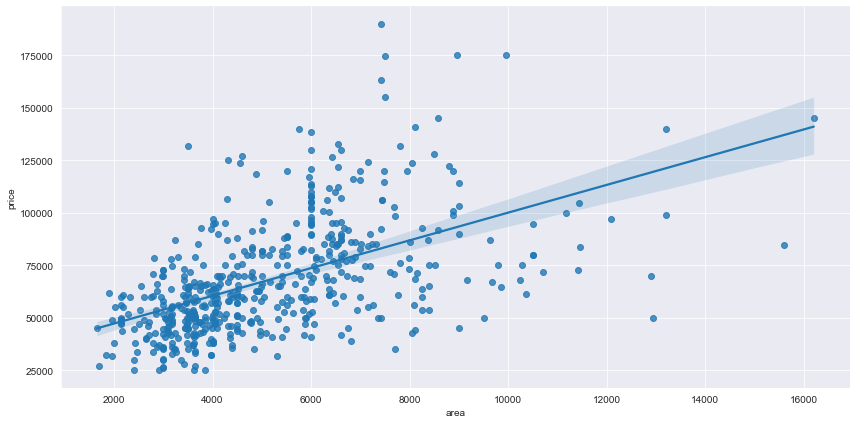

In [132]:
sns.lmplot(data = house, x = 'area', y = 'price', height = 6, aspect = 2)

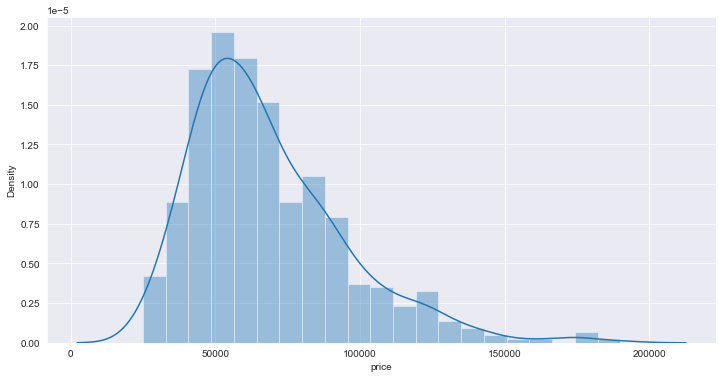

In [133]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(house['price'])
plt.show()

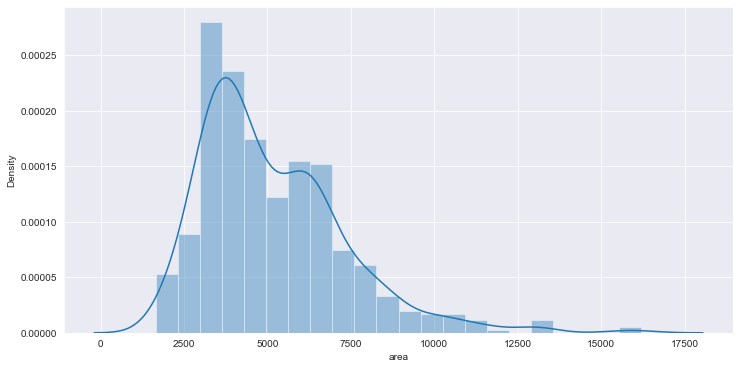

In [134]:
sns.distplot(house['area'])
plt.show()

In [135]:
house.columns

Index(['price', 'area', 'rooms', 'bathroom', 'floors', 'driveway', 'game_room',
       'cellar', 'gas', 'air', 'garage', 'situation'],
      dtype='object')

## Standardize data

In [136]:
house1 = house.iloc[:,:].values  #standardize the data to normal distribution
from sklearn import preprocessing
housex = preprocessing.scale(house1)
house = pd.DataFrame(housex, columns=house.columns) # columns=house.columns[2:6] if iloc[:,2:6]

In [138]:
# Import the libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [139]:
# We now instatiate a Linear Regression object
lm = LinearRegression()

In [140]:
# let's do the split of the dataset
house.columns
X = house[['area', 'rooms', 'bathroom', 'floors', 'driveway', 'game_room',
       'cellar', 'gas', 'air', 'garage', 'situation']]
y = house['price']

In [141]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [142]:
## Let's chec the head of some of these splits
X_test.head()
# We see that they are randomly selected

,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
225,-1.084986,0.047235,1.423737,0.221704,-2.467977,-0.464796,1.363319,-0.219054,1.468356,0.357567,-0.553372
18,-0.784917,-2.667529,-0.569495,-0.931157,0.405190,-0.464796,-0.733504,-0.219054,-0.681034,-0.804525,-0.553372
48,-0.087835,1.404617,-0.569495,1.374565,-2.467977,-0.464796,-0.733504,-0.219054,-0.681034,-0.804525,-0.553372
355,2.363032,0.047235,-0.569495,-0.931157,0.405190,-0.464796,-0.733504,-0.219054,-0.681034,0.357567,1.807104
350,2.174220,0.047235,-0.569495,-0.931157,0.405190,-0.464796,-0.733504,-0.219054,-0.681034,-0.804525,-0.553372


In [143]:
# Now let's build the model using sklearn
lm.fit(X_test,y_test)

LinearRegression()

In [144]:
# Now let's look at the coefficients
print(lm.coef_)
# it would be nicer if we can put them together in a dataframe

[0.22526122 0.01320334 0.2793606  0.20499524 0.14389589 0.05962461
 0.17957573 0.06146765 0.21677806 0.06822348 0.11743385]


In [145]:
coef = pd.DataFrame(lm.coef_, X.columns, columns = ['Coefficients'])
coef

,Coefficients
area,0.225261
rooms,0.013203
bathroom,0.279361
floors,0.204995
driveway,0.143896
game_room,0.059625
cellar,0.179576
gas,0.061468
air,0.216778
garage,0.068223


In [146]:
predictions = lm.predict(X_test)

<AxesSubplot:xlabel='price'>

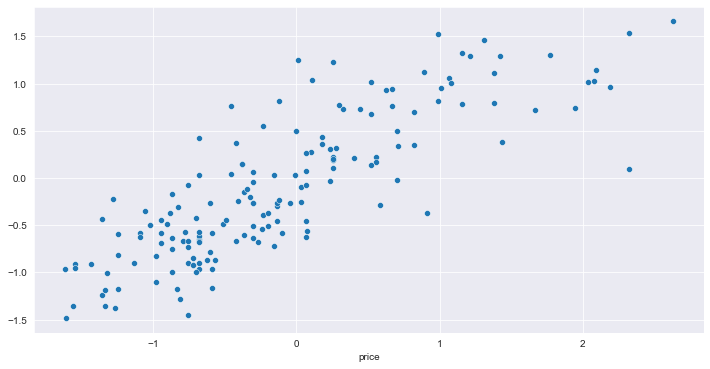

In [147]:
# To check the quality of our model, let's plot it
sns.scatterplot(y_test, predictions)

In [148]:
print("r2_score:",r2_score(y_test, predictions))

r2_score: 0.680602815192172


In [149]:
#MAE
mean_absolute_error(y_test, predictions)

0.38416310787028896

In [150]:
#MSE
mean_squared_error(y_test, predictions)

0.2645837812101742

In [151]:
#RMSE
print(np.sqrt(mean_squared_error(y_test, predictions)))

0.5143770807590227


In [152]:
# method with sm lib-
# Unlike sklearn that adds an intercept to our data for the best fit, statsmodel doesn't. We need to add it ourselves
# Remember, we want to predict the price based off our features.
# X represents our predictor variables, and y our predicted variable.
# We need now to add manually the intercepts
import statsmodels.api as sm
X_endog = sm.add_constant(X_test)

In [153]:
res = sm.OLS(y_test, X_endog)
res.fit()

In [154]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     29.45
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           2.53e-32
Time:                        13:45:46   Log-Likelihood:                -123.68
No. Observations:                 164   AIC:                             271.4
Df Residuals:                     152   BIC:                             308.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0524      0.043     -1.220      0.224      -0.137       0.032
area           0.2253      0.046      4.890      0.000       0.134       0.316
rooms          0.0132      0.046      0.287      0.775      -0.078       0.104
bathroom       0.2794      0.050      5.603      0.000       0.181       0.378
floors         0.2050      0.059      3.473      0.001       0.088       0.322
driveway       0.1439      0.042      3.408      0.001       0.060       0.227
game_room      0.0596      0.047      1.266      0.207      -0.033       0.153
cellar         0.1796      0.048      3.736      0.000       0.085       0.275
gas            0.0615      0.049      1.261      0.209      -0.035       0.158
air            0.2168      0.047      4.596      0.000       0.124       0.310
garage         0.0682      0.045      1.515      0.132      -0.021       0.157
situation      0.1174      0.048      2.460      0.015       0.023       0.212
==============================================================================
Omnibus:                       17.037   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.373
Skew:                           0.535   Prob(JB):                     6.90e-07
Kurtosis:                       4.734   Cond. No.                         2.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Evaluation metrics
# Mean Absolute Error (MAE)
# Mean Squared Error (MSE)
# Root Mean Squared Error(RMSE)
#import numpy as np
#from sklearn import metrics

#print('MAE :', metrics.mean_absolute_error(y_test, predictions))
#print('MSE :', metrics.mean_squared_error(y_test, predictions))
#print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE : 10248.782807401953
MSE : 188311345.17713058
RMSE : 13722.658094448414

In [155]:
X_endog_test = sm.add_constant(X_test)
model = res.fit()
predictions = model.predict(X_endog_test)

In [156]:
predictions

225    0.273216
18    -0.996519
48    -0.726503
355    0.104917
350   -0.294097
         ...   
401    0.769926
189   -0.239442
43     1.117195
36    -0.541536
405    0.764655
Length: 164, dtype: float64